In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as implt

In [0]:
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'

In [0]:
def plot_image(image):
    plt.imshow(image)
    plt.show()
    
def roll_spectrum(spectrum):
    n, m = spectrum.shape
    spectrum = np.roll(spectrum, n//2, axis=0)
    spectrum = np.roll(spectrum, m//2, axis=1)
    return spectrum

def plot_spectrum(spectrum):
    roll_spectrum(spectrum)
    plot_image(np.log(np.absolute(spectrum)))
    
def recover_image(image_fft):
    image_recovered = np.fft.irfft2(image_fft)
    plot_image(image_recovered.real)
    return image_recovered.real
    
def normalize(array):
    return array / np.max(np.abs(array))
  
def previewCompression(input_image_fft, cutoff_amplitude=1e5, verbose=False):
    # 0 out all components below the cutoff
    output_image_fft = input_image_fft.copy()
    np.place(output_image_fft, abs(output_image_fft) < cutoff_amplitude, [0])
    
    if verbose: 
        recover_image(output_image_fft)  # Display compressed image
        
        # Display information on the compression of the image
        original_size = output_image_fft.shape[0]*output_image_fft.shape[1]
        components_removed = np.argwhere(abs(output_image_fft) < cutoff_amplitude).shape[0]
        percent_removed = (1-components_removed/original_size)*100
        print("Removed {} out of {} components. Image contains {}% of the original components.".format(components_removed, original_size, percent_removed))
    
    return output_image_fft

Uncompressed Image


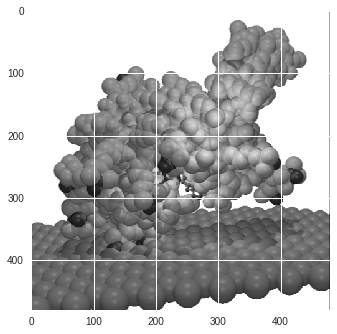

Compressed Image


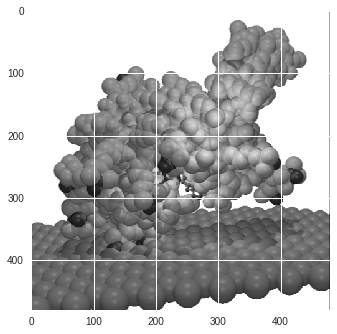

Removed 0 out of 115680 components. Image contains 100.0% of the original components.


In [6]:
image = implt.imread("glow.tiff")
image_grey = image.sum(axis=2)
image_grey_fft = np.fft.rfft2(image_grey)

# plot_image(image)
# plot_spectrum(image_grey_fft)

print("Uncompressed Image")
plot_image(image_grey)

print("Compressed Image")
image_compressed_fft = previewCompression(image_grey_fft, cutoff_amplitude=0.5 ,verbose=True)

# implt.imsave('lossy_img.jpg', recover_image(image_compressed_fft))